In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###  import dataset using seaborn

In [2]:
tips_df = sns.load_dataset('tips')


### head of dataframe

In [3]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips_df.shape

(244, 7)

In [5]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Categorical Plots

### 1- barplot    ------ args = (x='' , y ='' , data = ? df , estimator = (np.[mean(default), std]))

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

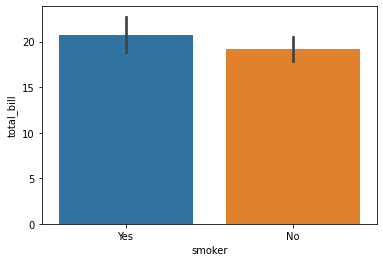

In [12]:
sns.barplot(x ='smoker', y = 'total_bill', data=tips_df, estimator=np.mean)

### 2- countplot   ------- args = (x  = '', data= ? df )

<AxesSubplot:xlabel='count', ylabel='sex'>

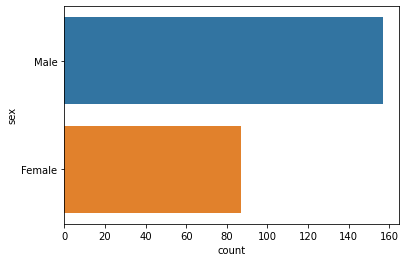

In [19]:
sns.countplot(y="sex" , data = tips_df)


# tips_df.groupby("time").time.count()

### 3- boxplot   ------ args(x='', y = '', data= ? df, hue = (column name of categorical items))   example: day vs total_bill

Sun
Sat
Thur
Fri


,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


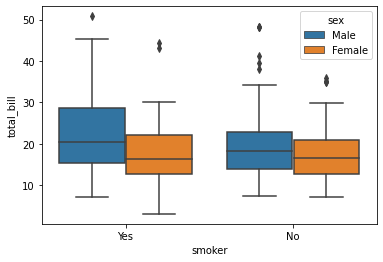

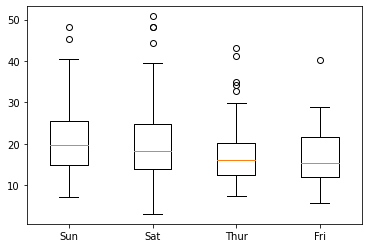

In [25]:
sns.boxplot(x = 'smoker', y = 'total_bill', data = tips_df, hue="sex")



class_day = list(set(tips_df['day']))


tips_list = []

for i in class_day:
    print(i)
    tips_list.append(tips_df['total_bill'][tips_df['day']==i].tolist())
    

    
plt.figure()
plt.boxplot(tips_list, labels=class_day)
    

tips_df[tips_df['total_bill']>45]

### 4- violinplot   args(x='', y = '', data= ? df)
​

<AxesSubplot:xlabel='day', ylabel='tip'>

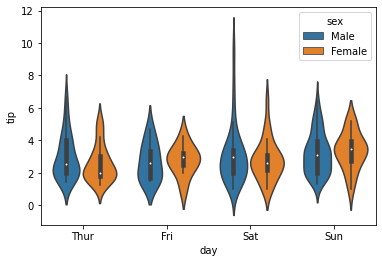

In [26]:
sns.violinplot(x = 'day', y = 'tip', data=tips_df, hue="sex")

## Distribution Plots

### 1- distplot   ------------     args = (data(one dim data), kde=(False or True), bins=(integer))

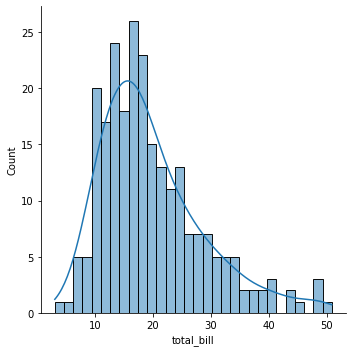

In [30]:
sns.displot(tips_df['total_bill'], kde = True , bins=30)

#TODO prob dis??

### 2- jointplot  ----------- args =(x = '', y = '' , data = ?(df) , kind = (default scatter , ['reg','hex' , 'kde'])

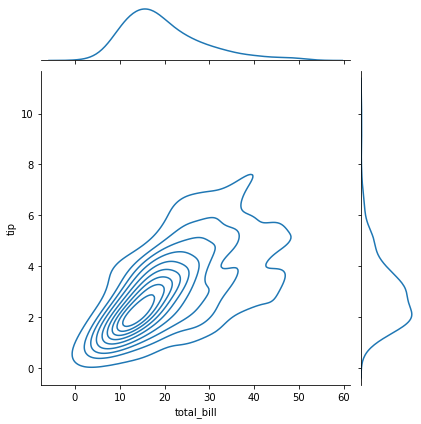

In [33]:
sns.jointplot(x = 'total_bill', y= 'tip', data = tips_df, kind='kde')

### 3- pairplot   --------- pairwise relationships across entire dataFrame   ----- args=( df , hue = (column name of categorical items) , )

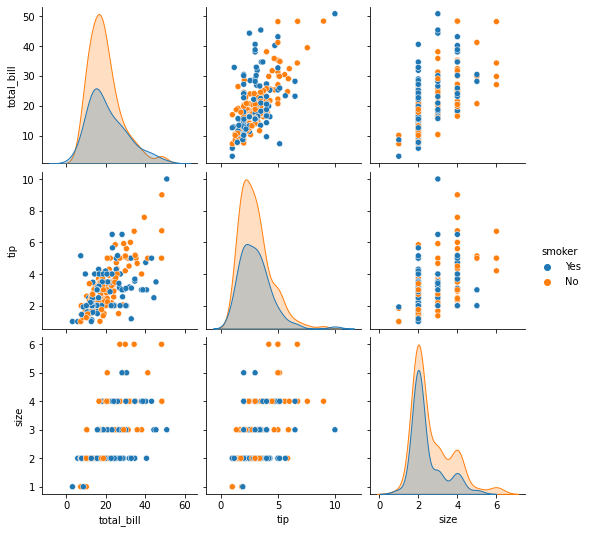

In [36]:
sns.pairplot(tips_df, hue="smoker")

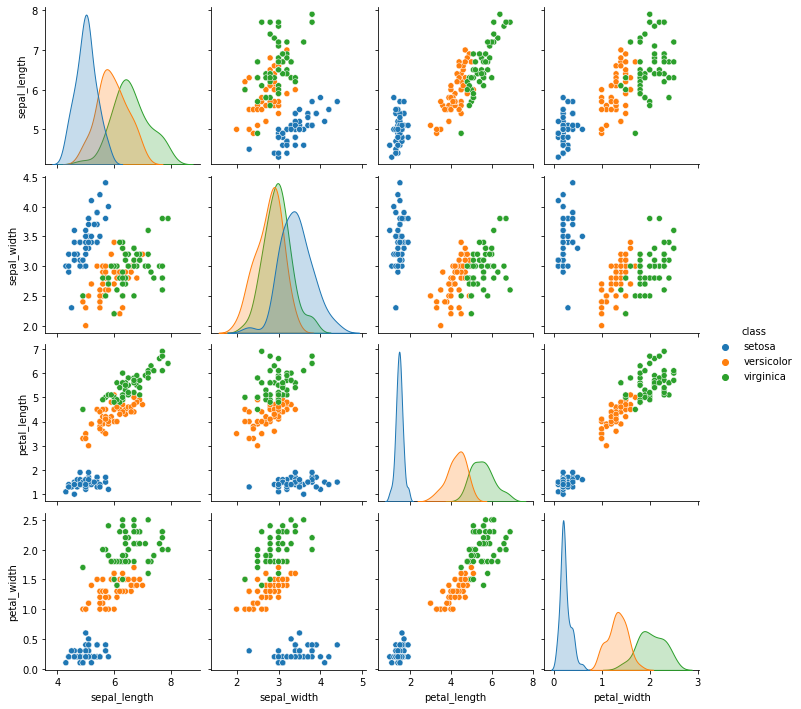

In [6]:
iris_df = pd.read_csv("data/iris.csv")
sns.pairplot(iris_df, hue="class")

### 4- rugplot    ----------  args = (df['column name'])

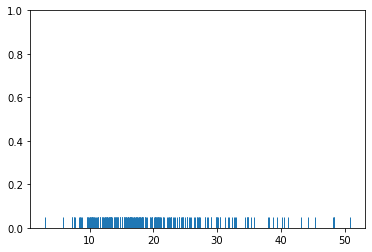

In [38]:
sns.rugplot(tips_df['total_bill'])

### kernel density estimation

#### wikipedia

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. In some fields such as signal processing and econometrics it is also termed the Parzen–Rosenblatt window method, after Emanuel Parzen and Murray Rosenblatt, who are usually credited with independently creating it in its current form.[1][2] One of the famous applications of kernel density estimation is in estimating the class-conditional marginal densities of data when using a naive Bayes classifier,[3][4] which can improve its prediction accuracy dramatically.

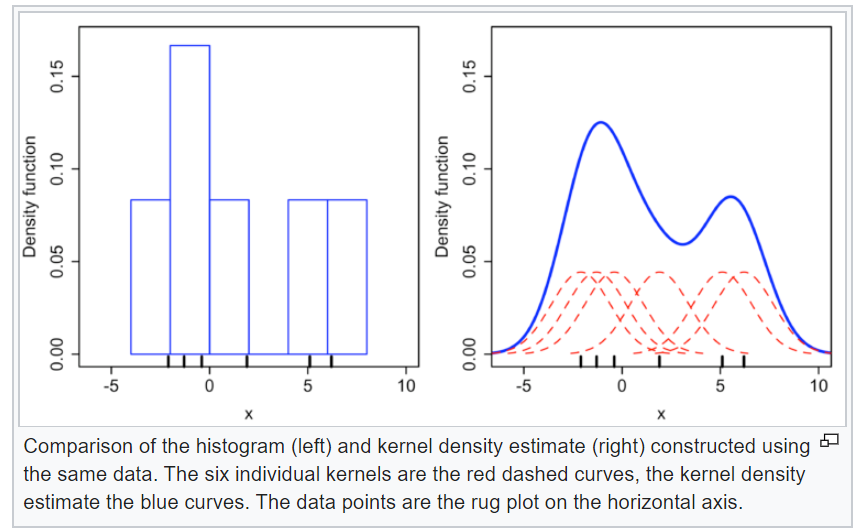

In [17]:
## TODO   kde implement

## correlation ----->    df.corr()

In [39]:
tips_df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### seaborn heatmap    sns.heatmap(cor_mat, annot = [True, False], cmap(color map) = ['coolwarm'])

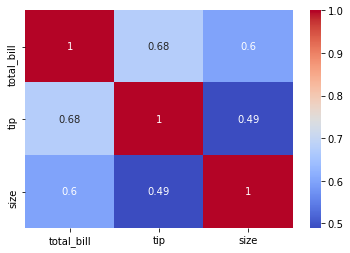

In [44]:
sns.heatmap(tips_df.corr(), annot=True, cmap='coolwarm')

In [50]:
tp = tips_df.pivot_table(index='sex', columns='day', values = 'total_bill')
tp

day,Thur,Fri,Sat,Sun
sex,,,,
Male,18.714667,19.857000,20.802542,21.887241
Female,16.715312,14.145556,19.680357,19.872222


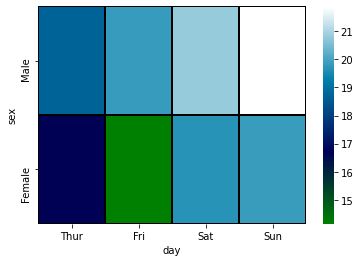

In [52]:
sns.heatmap(tp , cmap='ocean' , linecolor='black' , linewidths=1)

## Grid Plots

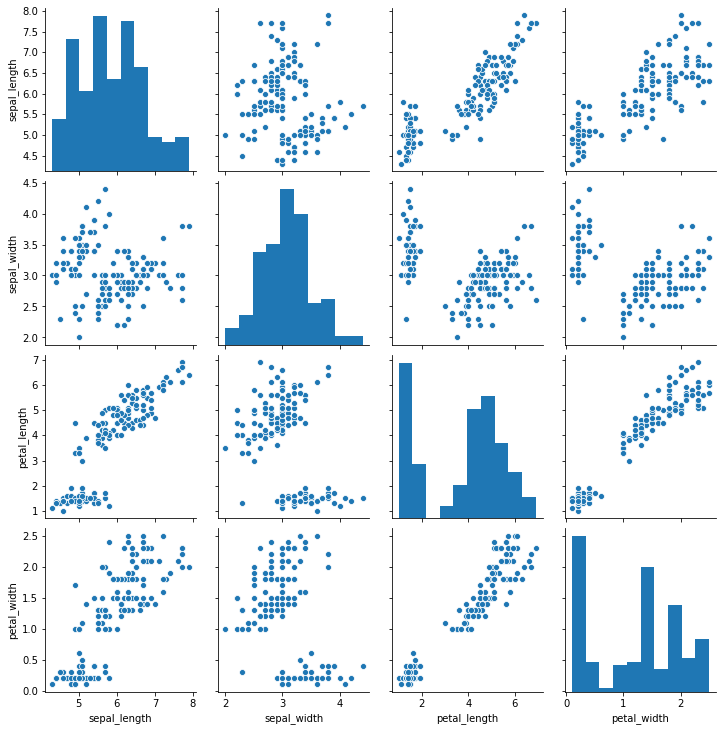

In [54]:
iris_df = sns.load_dataset('iris')
sns.pairplot(iris_df)

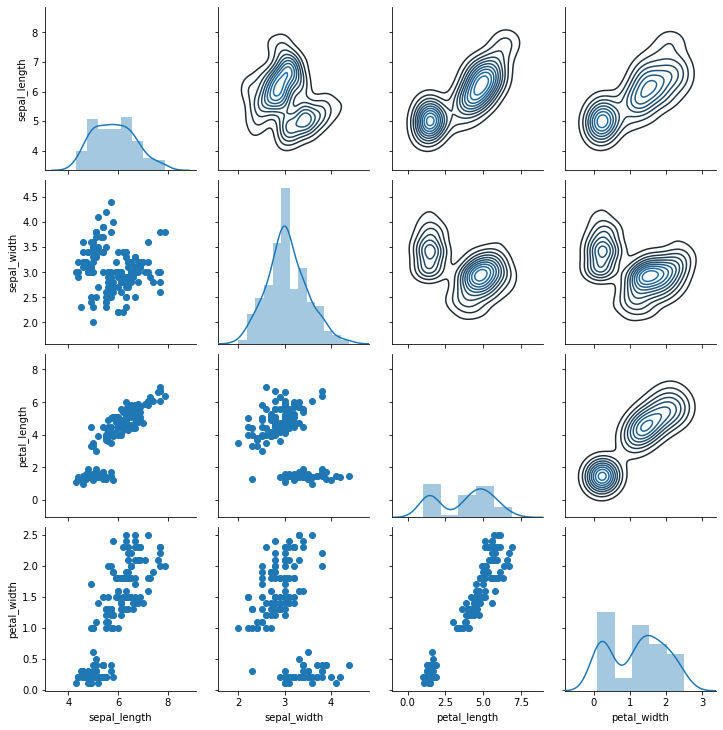

In [61]:
grid_iris = sns.PairGrid(iris_df)
# grid_iris.map(plt.scatter)
grid_iris.map_diag(sns.distplot)
grid_iris.map_upper(sns.kdeplot)
grid_iris.map_lower(plt.scatter)

### linear model Plots (lm)   ------> regression

sns.lmplot(x = '', y = '', data = ?? , hue = )

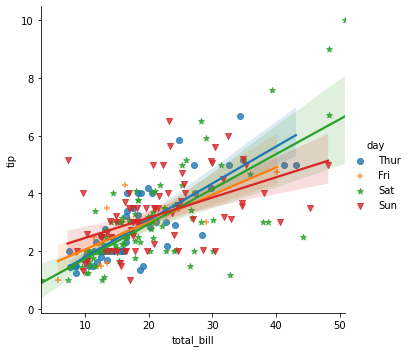

In [68]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips_df , hue = 'day' , markers = ['o', '+', '*', 'v'])

In [ ]:
# TODO hue 'sex'  , 'day'